In [1]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Specify the path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\bbartling\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Function to extract text from an image region
def image_to_text(image, region=None):
    if region:
        image = image[region[1]:region[3], region[0]:region[2]]
    text = pytesseract.image_to_string(image)
    return text

# Function to process the image and extract text from defined regions
def process_image(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    # Define regions
    regions = {
        'return_air': (width // 2, 0, width, height // 2),
        'exhaust_air': (0, 0, width // 2, height // 2),
        'outside_air': (0, height // 2, width // 2, height),
        'discharge_air': (width // 2, height // 2, width, height),
        'mixing_area': (width // 4, height // 4, 3 * width // 4, 3 * height // 4)
    }

    results = {}
    for region_name, region_coords in regions.items():
        text = image_to_text(image, region_coords)
        results[region_name] = text.strip()
        # Display the region
        region_image = image[region_coords[1]:region_coords[3], region_coords[0]:region_coords[2]]
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(region_image, cv2.COLOR_BGR2RGB))
        plt.title(f'{region_name} Region')
        plt.axis('off')
        plt.show()
        print(f"Region: {region_name}")
        print(f"Text found:\n{text}\n{'-'*40}")

    return results


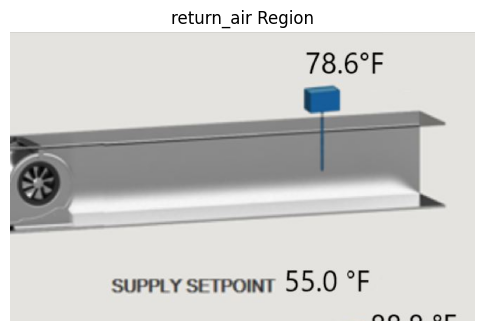

Region: return_air
Text found:
78.6°F

suppcy setpoint 55.0 °F

le i i) ee mt

----------------------------------------


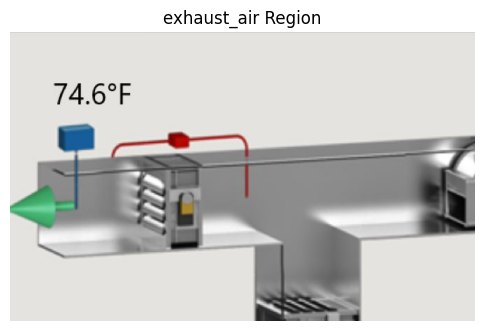

Region: exhaust_air
Text found:
74.6°F


----------------------------------------


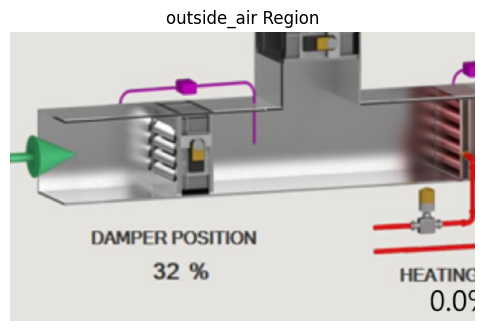

Region: outside_air
Text found:
32 %


----------------------------------------


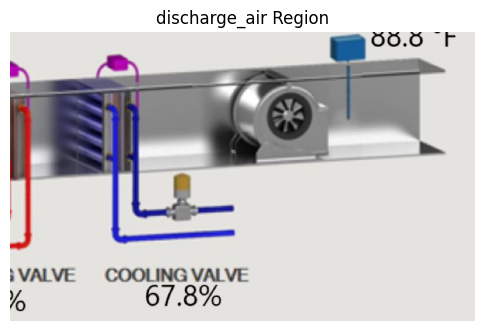

Region: discharge_air
Text found:
}VALVE COOLING VALVE

Yo 67.8%

----------------------------------------


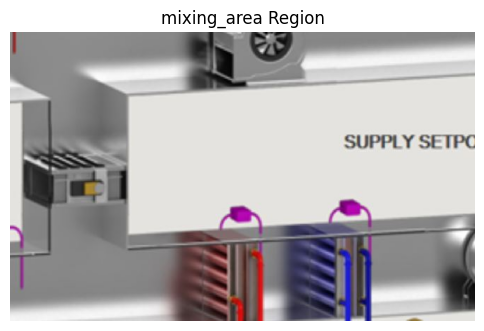

Region: mixing_area
Text found:

----------------------------------------
Region: return_air
Text found:
78.6°F

suppcy setpoint 55.0 °F

le i i) ee mt
----------------------------------------
Region: exhaust_air
Text found:
74.6°F
----------------------------------------
Region: outside_air
Text found:
32 %
----------------------------------------
Region: discharge_air
Text found:
}VALVE COOLING VALVE

Yo 67.8%
----------------------------------------
Region: mixing_area
Text found:

----------------------------------------


In [3]:
# Specify the path to your image
image_path = r'C:\Users\bbartling\Desktop\HVACGraphicsClassifier\data\ahu\ahu_heat_broken_sim.jpg'

# Process the image and extract text from defined regions
results = process_image(image_path)

# Print the results
for region_name, text in results.items():
    print(f"Region: {region_name}")
    print(f"Text found:\n{text}\n{'-'*40}")